<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_EcuacionesDiferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscilacones Acopladas

Considere dos osciladores acoplados, de masas idénticas y  conectadas mediante tres resortes de constantes elásticas $k_1, k_2, k_3$. Como se muestra en la figura.





In [2]:
import matplotlib.pylab as plt
#from google.colab import files
#from IPython.display import Image
#uploaded = files.upload()


In [3]:
from scipy.integrate import odeint
import numpy as np

In [69]:
#@title Solución para $\frac{ \mathrm{d}^2 x}{\mathrm{d}t^2} + w²x = 0 $


#Función
def func(y,t,m,k):
  omega = np.sqrt(k/m)
  dxdt = y[1]
  dxdt2 = -(omega**2) * y[0]

  return np.array((dxdt,dxdt2))

#Condiciones iniciales
pos_i, vel_i = 1, 1e-20
y0 = np.array((pos_i, vel_i))
t = np.linspace(0,100,1000)

m = 1
k = 0.1
args = (m,k)

#Odeint
p = odeint(func, y0, t, args)

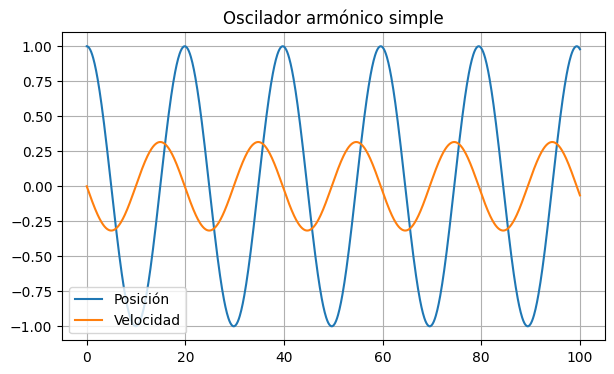

In [70]:
plt.figure(figsize=(7,4))
plt.title('Oscilador armónico simple')
plt.plot(t,p[:,0], label='Posición')
plt.plot(t,p[:,1], label='Velocidad')
plt.legend()
plt.grid()




Después de realizar un análisis detallado del problema, a través de las leyes de Newton ó empleando las ecuaciones de Euler-Lagrange, se puede mostrar que las ecuaciones de movimiento para el sistema vienen dadas por: 

\begin{equation}
m_1 \frac{ \mathrm{d}^2 x_1 }{\mathrm{d}t^2} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}



\begin{equation}
m_2 \frac{ \mathrm{d}^2 x_2 }{\mathrm{d}t^2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

De forma compacta,  la ecuacion anterior puede ser escrita como: 


\begin{equation}
m_1 \ddot{x_1} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}



\begin{equation}
m_2  \ddot{x_2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

donde $\ddot{x} =\frac{\mathrm{d^2}x}{\mathrm{d}t^2}$.

Las ecuaciones anteriores, son ecuaciones diferenciales lineales de segundo orden y acopladas, que pueden ser escritas de forma matricial como $m\vec{\ddot{x}}= -A\vec{x}$, donde A, es una matriz simétrica: 

\begin{equation}
m
\begin{pmatrix} 
\ddot{x_1}  \\
\ddot{x_2}    
\end{pmatrix}
=-
\begin{pmatrix} 
k_1 + k_2 & -k_2  \\
-k_2       &  k_2+k_3  \\
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
\end{equation}


Para resolver el sistema de ecuaciones acopladas, se puede realizar una transformación, que permite desacoplar el sistema de ecuaciones diferenciales. Sea
 $\vec{\eta}=S\vec{x}$, donde $\eta$ es una nueva variable en el sistema transformado y S una matriz que cumple que $SAS^{-1}=A_d$, siendo $A_d$ una matriz diagonal. 


In [6]:
#@title Hallando $S$ :

k = 0.4 #Definimos un k
k2 = 2  #Definimos un k2
k1 = k  #Sean k1 = k3 = k
k3 = k  #Sean k1 = k3 = k

m = 2   #Definimos la masa 

A = np.array([[k1+k2, -k2],  #Hacemos la matriz de constantes elásticas
             [-k2,  k2+k3]])

autoval, autovec = np.linalg.eig(A) #Cálculo autovalores y autovectores

S = autovec #S es la matriz de autovectores
Ad = np.linalg.inv(S) @ A @ S #Diagonalización

print(f'Diagonalización:\n{Ad}\n------------')
print(f'Matriz S:\n{S}')

Diagonalización:
[[ 4.40000000e+00 -8.88178420e-16]
 [-6.38378239e-16  4.00000000e-01]]
------------
Matriz S:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Se cumple que $\vec{\ddot {\eta}}=S\vec{\ddot{x}}$ 
 y  $m\vec{\ddot{x}}=A\vec{x}$, multiplicando por una matriz S, a ambos lados de la ecuación $m\vec{\ddot{x}}=-A\vec{x}$ obtenemos: 

\begin{equation}
mS\vec{\ddot{x}}=- S A\vec{x}
\end{equation}

\begin{equation}
m \vec{\ddot{\eta}} = -S A S^{-1}S\vec{x}
\end{equation}


\begin{equation}
m \vec{\ddot{\eta}} = -(S A S^{-1})\eta
\end{equation}


\begin{equation}
m \vec{\ddot{\eta}} = -A_d\eta
\end{equation}

\begin{equation}
m\begin{pmatrix} 
\ddot{\eta_1}\\
\ddot{\eta_2}
\end{pmatrix}
=
-\begin{pmatrix} 
\lambda_1 & 0\\
0          &\lambda_2
\end{pmatrix}
\begin{pmatrix} 
\eta_1\\
\eta_2
\end{pmatrix},
\end{equation}

donde $\lambda=m\omega^2$ son los autovalores de A. Notese que S es la matriz formada por los autovectores de A. La ecuacion anterior, tiene solución en términos de funciones armónicas.


In [7]:
#@title Hallando $\lambda$ :

A = np.array([[k1+k2, -k2],  #Hacemos la matriz de constantes elásticas
             [-k2,  k2+k3]])

autoval, autovec = np.linalg.eig(A) #Cálculo autovalores y autovectores

λ = autoval   #λ son los autovalores de la matriz A

print(f'λ1 = {λ[0]}, λ2 = {λ[1]}')

λ1 = 4.4, λ2 = 0.40000000000000036


Basado en lo anterior, y resolviendo  el problema más sencillo en el que $k_1 = k_3 = k$, tenemos que:


\begin{equation}
\begin{pmatrix} 
\frac{k + k_2}{m}-\omega^2 & -\frac{k_2}{m}\\
 -\frac{k_2}{m}          &\frac{k_2 + k}{m}-\omega^2
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
=
-\begin{pmatrix} 
0\\
0
\end{pmatrix}
\end{equation}


\begin{equation}
det(A-\omega^2 I)= \left(\frac{k + k_2}{m}-\omega^2\right) \left(\frac{k_2+k}{m}-\omega^2\right )-\frac{k_2^2}{m^2}=0
\end{equation}

Resolviendo para $\omega^2$, tenemos que : 

\begin{equation}
\omega^2_1=\frac{k+2k_2}{m}
\end{equation}


\begin{equation}
\omega^2_2=\frac{k}{m}, 
\end{equation}


los autovecres vienen dados por: 

\begin{equation}
\vec{v_1}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
-1
\end{pmatrix}
\end{equation}


\begin{equation}
\vec{v_2}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
1
\end{pmatrix}
\end{equation}

y la matriz S, viene dada por: 


\begin{equation}
S=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1\\
1 & 1
\end{pmatrix}
\end{equation}

las variables $x_1,x_2$, en terminos de $\eta$ están dadas por: 

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}

En conclusión el problema puede ser resuelto, si solucionamos la 
ecuaciones diferenciables desacopladas: 
\begin{equation}
\ddot{\eta_1}+\omega_1\eta_1=0
\end{equation}

\begin{equation}
\ddot{\eta_2}+\omega_2\eta_2=0
\end{equation}

 con: 
 
 \begin{equation}
\omega^2_1=\frac{k+2k_2}{m}
\end{equation}


\begin{equation}
\omega^2_2=\frac{k}{m}
\end{equation}


In [8]:
#@title Hallando $\omega^2$ usando $\omega^2 = \frac{\lambda}{m}$ :

ω = λ/m
print(f'''Con m = {m}, λ1 = {λ[0]}, λ2 = {round(λ[1],3)}:

ω1^2 = {ω[0]} 
ω2^2 = {round(ω[1],3)}''')

Con m = 2, λ1 = 4.4, λ2 = 0.4:

ω1^2 = 2.2 
ω2^2 = 0.2


# Su tarea será:

1. Considerar un sistema de dos osciladores acoplados, con constantes elásticas $k_1=k_3$,  $k_2$ y construir un programa que permita realizar los cálculos anteriores de forma sistemática. Es decir, se deberá resolver el problema de autovalores y autovectores, para encontrar las frecuencias de oscilación y la matriz diagonal. La ecuación diferencial  para $\eta$,  deberá ser resuelta  numéricamente y comparada con la solución análitica, la cual viene dada por: 


\begin{equation}
\eta_1(t)=\eta_1(0)\cos(\omega_1t)+ \frac{\dot{\eta_1}(0)}{\omega_1}\sin(\omega_1t)
\end{equation}

\begin{equation}
\eta_2(t)=\eta_2(0)\cos(\omega_2t)+ \frac{\dot{\eta_2}(0)}{\omega_2}\sin(\omega_1t)
\end{equation}

y empleando: 

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}
tenemos que la solución exacta, al problema viene dada por: 

\begin{equation}
x_1(t)=\frac{1}{2}(x_1(0)-x_2(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_1}(0)-\dot{x_2}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}

\begin{equation}
x_2(t)=\frac{1}{2}(x_2(0)-x_1(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_2}(0)-\dot{x_1}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}


La ecuacion anterior tiene solución según las condiciones iniciales. Muestre que la solucion numérica coincide con la analíítica, para ello, realice graficas de ambas soluciones y comparelas, cuando considera  la evolución temporal de $x_1$, $x_2$ para las siguientes condiciones:

- **Modo simétrico:** $x_1(0) = x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
- **Modo antisimétrico:** $x_1(0)=-x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
-  $x_1(0)=A, x_2(0) = 0$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 



2. Para el última condición, suponga que el acoplamiento es debil, es decir $k_2<<k$. ¿Cómo es la evolucion temporal de $x_1$ y $x_2$ en este caso?.

3. ¿Qué puede concluir de sus resultados?

4.  Generalizar el problema, para constantes elásticas de los resortes $k_1, k_2, k_3$ y masas de $m_1, m_2, m_3$.

5. Realice una animación del movimiento de las particulas en el espacio, segun los resultados obtenidos.




**RETO 1** Considere ahora, un sistema con amortiguamiento proporcional a la velocidad, las ecuaciones de movimiento, 
vienen dadas por:

\begin{equation}
m\ddot{y_1} + \gamma \dot{y_1} + (k +k_2) y_1 - k_2 y_2 = 0
\end{equation}


\begin{equation}
m\ddot{y_2} + \gamma \dot{y_2} + (k +k_2) y2 - k_2 y_1 = 0
\end{equation}

Estudiar en este caso, la evolucion temporal de cada masa para diferentes condiciones. 

**RETO 2** Considere 10 osciladores acoplados, ¿Qué tipo de soluciones se pueden obtener este caso?




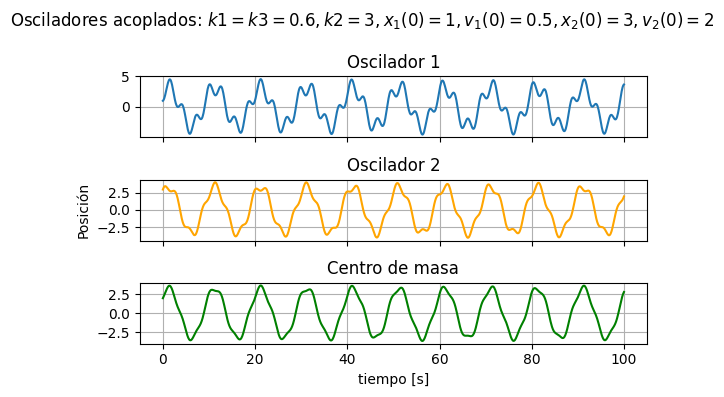

In [139]:
#@title _Generalización, solución numérica:_

#Creamos la función con las ecuaciones acopladas
def oscilador_doble(cond, t, m1, m2, k1, k2, k3): #Pide condiciones de posiciones, velocidades iniciales, y las constantes

  dxdt_1 = cond[1]    #Velocidad del oscilador 1
  dxdt2_1 = -(k1/m1)*cond[0] + (k2/m1)*(cond[2] - cond[0])

  dxdt_2 = cond[3]    #Velocidad del oscilador 2
  dxdt2_2 = -(k3/m2)*cond[2] - (k2/m2)*(cond[2] - cond[0])

  return np.array((dxdt_1, dxdt2_1, dxdt_2, dxdt2_2))

#Array del tiempo
t = np.linspace(0,100,1000)

#Condiciones iniciales
pos_1, vel_1, pos_2, vel_2 = 1,  0.5,  3,  2
condiciones = np.array((pos_1, vel_1, pos_2, vel_2))

m1 = 1
m2 = 2
k1, k2 = 0.6, 3
k3 = k1
args = (m1, m2, k1, k2, k3)

#Solución de las ecuaciones diferenciales con odeint
p = odeint(oscilador_doble, condiciones, t, args)

#GRAFICACIÓN--------------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(6,4))
fig.suptitle(f'Osciladores acoplados: $k1=k3={k1}, k2={k2}, x_1(0)={pos_1}, v_1(0)={vel_1}, x_2(0)={pos_2}, v_2(0)={vel_2}$')

#Oscilador 1
ax1.plot(t, p[:,0])
ax1.set_title('Oscilador 1')
ax1.grid()

#Oscilador 2
ax2.plot(t, p[:,2], color='orange')
ax2.set_title('Oscilador 2')
ax2.set(ylabel = 'Posición')
ax2.grid()

#Centro de masa
ax3.plot(t, (p[:,0]+p[:,2])/2, color='green')
ax3.set_title('Centro de masa')
ax3.set(xlabel='tiempo [s]')
ax3.grid()

fig.tight_layout()

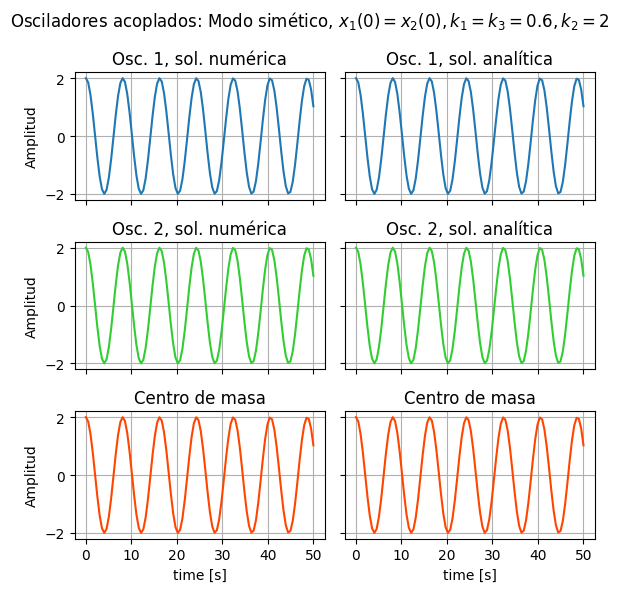

In [153]:
#@title 1. **Modo simétrico:** $x_1(0) = x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 

#CONDICIONES INICIALES
#Amplitudes
A = 2
x0_1 = A 
x0_2 = A
#Posiciones, velocidades
v_1, v_2 = 0, 0
condi = np.array((x0_1, v_1, x0_2, v_2))
#Masas, constantes resortes
m = 1
m1, m2 = m, m
k, k2 = 0.6, 2
k1,k3 = k, k
args = (m1, m2, k1, k2, k3)
#Modos de oscilación
ω_1 = np.sqrt((k+2*k2)/m)
ω_2 = np.sqrt(k/m)

time = np.linspace(0,50, 100)
p_acoplados = odeint(oscilador_doble, condi, time, args)

#Funciones de la solución analítica
def x_1(t):
  x = (1/2)*(x0_1 - x0_2)*np.cos(ω_1*t) + (1/2)*(x0_1 + x0_2)*np.cos(ω_2*t)
  return x

def x_2(t):
  x = (1/2)*(x0_2 - x0_1)*np.cos(ω_1*t) + (1/2)*(x0_2 + x0_1)*np.cos(ω_2*t)
  return x

#Solución analítica
array1 = np.zeros(len(time))
array2 = np.zeros(len(time))
for i in range(len(time)):
  array1[i] = x_1(time[i])
  array2[i] = x_2(time[i])

#GRAFICACIÓN--------------------------------------------------------
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,6))
fig.suptitle(f'Osciladores acoplados: Modo simético, $x_1(0)=x_2(0), k_1=k_3={k}, k_2={k2}$')

#Soluciones numéricas
  #Oscilador 1
axs[0, 0].plot(time, p_acoplados[:,0])
axs[0, 0].set_title("Osc. 1, sol. numérica")
axs[0,0].grid()
  #Oscilador 2
axs[1, 0].plot(time, p_acoplados[:,2], color='limegreen')
axs[1, 0].set_title("Osc. 2, sol. numérica")
axs[1, 0].sharex(axs[0, 0])
axs[1,0].grid()
  #Centro de masa
axs[2, 0].plot(time, (p_acoplados[:,0]+p_acoplados[:,2])/2, color='orangered')
axs[2, 0].set_title("Centro de masa")
axs[2, 0].sharex(axs[0, 0])
axs[2,0].grid()

#Soluciones analíticas
  #Oscilador 1
axs[0, 1].plot(time, array1)
axs[0, 1].set_title("Osc. 1, sol. analítica")
axs[0,1].grid()
  #Oscilador 2
axs[1, 1].plot(time, array2, color='limegreen')
axs[1, 1].set_title("Osc. 2, sol. analítica")
axs[1,1].grid()
  #Centro de masa
axs[2, 1].plot(time, (array1 + array2)/2, color='orangered')
axs[2, 1].set_title("Centro de masa")
axs[2, 1].sharex(axs[0, 0])
axs[2,1].grid()

for ax in axs.flat:
    ax.set(xlabel='time [s]', ylabel='Amplitud')

for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

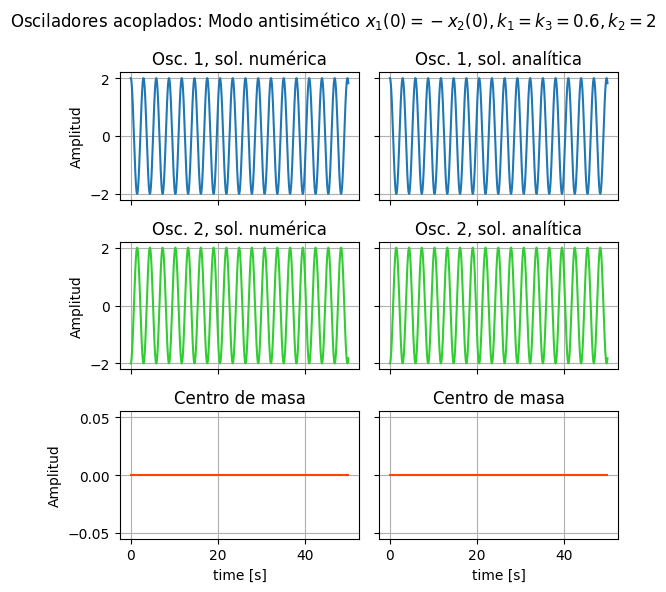

In [154]:
#@title - **Modo antisimétrico:** $x_1(0)=-x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 

#Amplitudes
A = 2
x0_1 = A 
x0_2 = -A

#Posiciones, velocidades
v_1, v_2 = 0, 0
condi = np.array((x0_1, v_1, x0_2, v_2))

time = np.linspace(0,50, 1000)
p_acoplados = odeint(oscilador_doble, condi, time, args)


array1 = np.zeros(len(time))
array2 = np.zeros(len(time))
for i in range(len(time)):
  array1[i] = x_1(time[i])
  array2[i] = x_2(time[i])

#GRAFICACIÓN--------------------------------------------------------
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,6))
fig.suptitle(f'Osciladores acoplados: Modo antisimético $x_1(0)=-x_2(0), k_1=k_3={k}, k_2={k2}$')

#Soluciones numéricas
  #Oscilador 1
axs[0, 0].plot(time, p_acoplados[:,0])
axs[0, 0].set_title("Osc. 1, sol. numérica")
axs[0,0].grid()
  #Oscilador 2
axs[1, 0].plot(time, p_acoplados[:,2], color='limegreen')
axs[1, 0].set_title("Osc. 2, sol. numérica")
axs[1, 0].sharex(axs[0, 0])
axs[1,0].grid()
  #Centro de masa
axs[2, 0].plot(time, (p_acoplados[:,0]+p_acoplados[:,2])/2, color='orangered')
axs[2, 0].set_title("Centro de masa")
axs[2, 0].sharex(axs[0, 0])
axs[2,0].grid()

#Soluciones analíticas
  #Oscilador 1
axs[0, 1].plot(time, array1)
axs[0, 1].set_title("Osc. 1, sol. analítica")
axs[0,1].grid()
  #Oscilador 2
axs[1, 1].plot(time, array2, color='limegreen')
axs[1, 1].set_title("Osc. 2, sol. analítica")
axs[1,1].grid()
  #Centro de masa
axs[2, 1].plot(time, (array1 + array2)/2, color='orangered')
axs[2, 1].set_title("Centro de masa")
axs[2, 1].sharex(axs[0, 0])
axs[2,1].grid()

for ax in axs.flat:
    ax.set(xlabel='time [s]', ylabel='Amplitud')

for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

CONCLUSIONES:

Al modo simético no le afecta el cambio de k2 ya que este no se estira ni se comprime
en ningún momento. En el modo antisimétrico sí pasa esto y se ve reflejado en la gráfica anterior.
En este caso, con k2 << k1, tenemos que el sistema presenta oscilaciones más parecidas a como lo
son en el modo simétrico (en términos de frecuencia). En términos de amplitud se siguen cancelando
dando a que el centro de masa no se mueva.
-------------------------------------------------------------------


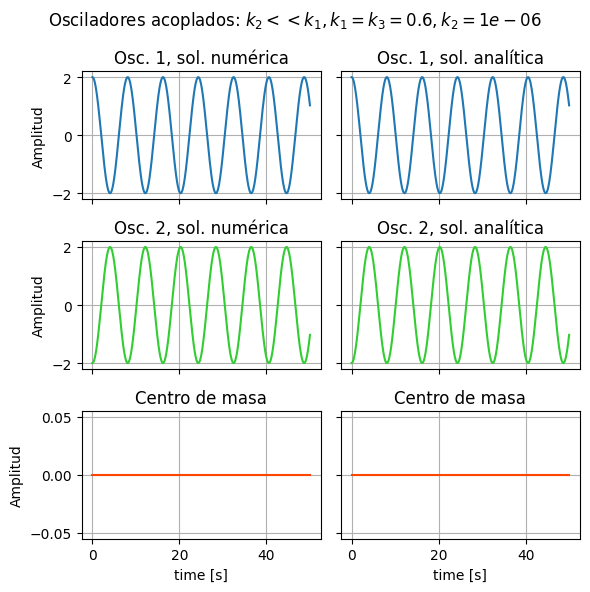

In [162]:
#@title **Suponiendo:** Para el última condición, suponga que el acoplamiento es debil, es decir $k_2<<k$. ¿Cómo es la evolucion temporal de $x_1$ y $x_2$ en este caso?.

#CONDICIONES INICIALES
#Amplitudes
A = 2
x0_1 = A 
x0_2 = -A
#Posiciones, velocidades
v_1, v_2 = 0, 0
condi = np.array((x0_1, v_1, x0_2, v_2))
#Masas, constantes resortes
m = 1
m1, m2 = m, m
k, k2 = 0.6, 0.000001
k1,k3 = k, k
args = (m1, m2, k1, k2, k3)
#Modos de oscilación
ω_1 = np.sqrt((k+2*k2)/m)
ω_2 = np.sqrt(k/m)

#Posiciones, velocidades
v_1, v_2 = 0, 0
condi = np.array((x0_1, v_1, x0_2, v_2))

time = np.linspace(0,50, 1000)
p_acoplados = odeint(oscilador_doble, condi, time, args)


array1 = np.zeros(len(time))
array2 = np.zeros(len(time))
for i in range(len(time)):
  array1[i] = x_1(time[i])
  array2[i] = x_2(time[i])

#GRAFICACIÓN--------------------------------------------------------
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(6,6))
fig.suptitle(f'Osciladores acoplados: $k_2<<k_1,  k_1=k_3={k}, k_2={k2}$')

#Soluciones numéricas
  #Oscilador 1
axs[0, 0].plot(time, p_acoplados[:,0])
axs[0, 0].set_title("Osc. 1, sol. numérica")
axs[0,0].grid()
  #Oscilador 2
axs[1, 0].plot(time, p_acoplados[:,2], color='limegreen')
axs[1, 0].set_title("Osc. 2, sol. numérica")
axs[1, 0].sharex(axs[0, 0])
axs[1,0].grid()
  #Centro de masa
axs[2, 0].plot(time, (p_acoplados[:,0]+p_acoplados[:,2])/2, color='orangered')
axs[2, 0].set_title("Centro de masa")
axs[2, 0].sharex(axs[0, 0])
axs[2,0].grid()

#Soluciones analíticas
  #Oscilador 1
axs[0, 1].plot(time, array1)
axs[0, 1].set_title("Osc. 1, sol. analítica")
axs[0,1].grid()
  #Oscilador 2
axs[1, 1].plot(time, array2, color='limegreen')
axs[1, 1].set_title("Osc. 2, sol. analítica")
axs[1,1].grid()
  #Centro de masa
axs[2, 1].plot(time, (array1 + array2)/2, color='orangered')
axs[2, 1].set_title("Centro de masa")
axs[2, 1].sharex(axs[0, 0])
axs[2,1].grid()

for ax in axs.flat:
    ax.set(xlabel='time [s]', ylabel='Amplitud')

for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()

print('''CONCLUSIONES:\n\nAl modo simético no le afecta el cambio de k2 ya que este no se estira ni se comprime
en ningún momento. En el modo antisimétrico sí pasa esto y se ve reflejado en la gráfica anterior.
En este caso, con k2 << k1, tenemos que el sistema presenta oscilaciones más parecidas a como lo
son en el modo simétrico (en términos de frecuencia). En términos de amplitud se siguen cancelando
dando a que el centro de masa no se mueva.\n-------------------------------------------------------------------''')